In [1]:
# tested using v"1.8.2"
VERSION

v"1.8.2"

In [2]:
# in case you need to install these packages
# using Pkg
# Pkg.add("Statistics")
# Pkg.add("LinearAlgebra")
# Pkg.add("Distributions")
# Pkg.add("MultivariateStats")
# Pkg.add("Plots")
# Pkg.add("Clustering")

In [3]:
using Statistics
using LinearAlgebra
using Distributions
using MultivariateStats

using Clustering

using Plots

In [4]:
#number of points for each distribution to be samples
N = 250

250

# z-score normalization

1. subtrack the mean from each element
2. divide by the standard deviation for each element

applies to a vector or to a matrix of elements (values)

In [5]:
function myStandardize(X)
    μ = mean(X, dims=1)
    σ = std(X, dims=1)
    return (X .- μ) ./ σ
end

myStandardize (generic function with 1 method)

### standardize a 1 dimensional dataset and then a 2 dimensional dataset

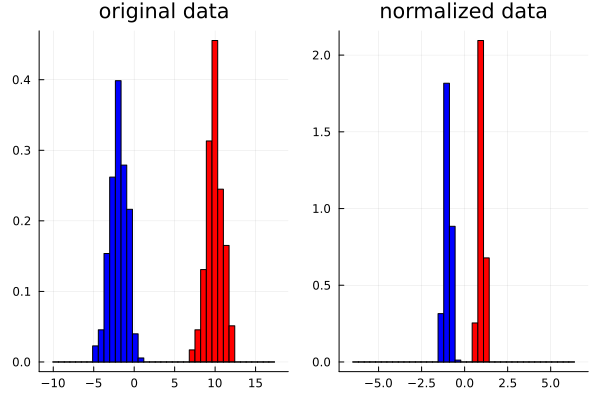

In [7]:
mean_tmp1 = 10
standardDeviation_tmp1 = 1
dist_tmp1 = Normal(mean_tmp1, standardDeviation_tmp1)
points_tmp1 = rand(dist_tmp1, N)

mean_tmp2 = -2
standardDeviation_tmp2 = 1
dist_tmp2 = Normal(mean_tmp2, standardDeviation_tmp2)
points_tmp2 = rand(dist_tmp2, N)

dataset_tmp = vcat(points_tmp1, points_tmp2);

#now standardize / normalize
dataset_tmp_normed = myStandardize(dataset_tmp)

#plot the before and after
p1 = plot(dataset_tmp[1:N], 
    bins=range(minimum(dataset_tmp)-5,maximum(dataset_tmp)+5,length=40),
    color=:red, title="original data",
    normalized=true, legend=false, seriestype=:histogram)
plot!(dataset_tmp[N+1:end], color=:blue,  
    bins=range(minimum(dataset_tmp)-5,maximum(dataset_tmp)+5,length=40),
    normalized=true, seriestype=:histogram)

p2 = plot(dataset_tmp_normed[1:N], 
    bins=range(minimum(dataset_tmp_normed)-5,maximum(dataset_tmp_normed)+5,length=40),
    color=:red, title="normalized data",
    normalized=true, legend=false, seriestype=:histogram)
plot!(dataset_tmp_normed[N+1:end], color=:blue,  
    bins=range(minimum(dataset_tmp_normed)-5,maximum(dataset_tmp_normed)+5,length=40),
    normalized=true, seriestype=:histogram)

plot( p1, p2, layout=grid(1,2) )

In [8]:
println("mean prior to normalization $(mean(dataset_tmp))")
println("mean after to normalization $(mean(dataset_tmp_normed))")

println("variance prior to normalization $(var(dataset_tmp))")
println("variance after to normalization $(var(dataset_tmp_normed))")

mean prior to normalization 3.99464291834078
mean after to normalization -1.2811973704174306e-16
variance prior to normalization 36.442012632346305
variance after to normalization 0.9999999999999999


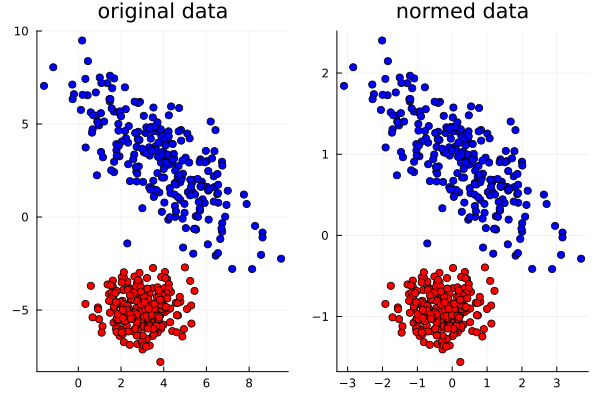

In [15]:
mean_tmp1 = [3,-5]
covariancematrix_tmp1 = [1 0; 0 1]
dist_tmp1 = MvNormal(mean_tmp1, covariancematrix_tmp1)
points_tmp1 = rand(dist_tmp1, N)

mean_tmp2 = [4,3]
covariancematrix_tmp2 = [4 -3; -3 5]
dist_tmp2 = MvNormal(mean_tmp2, covariancematrix_tmp2)
points_tmp2 = rand(dist_tmp2, N)

dataset_tmp = vcat( transpose(points_tmp1) , transpose(points_tmp2) );

#now standardize / normalize
dataset_tmp_normed = myStandardize(dataset_tmp)

#plot the before and after
p1 = plot( dataset_tmp[:,1], dataset_tmp[:,2], seriestype=:scatter, 
        markercolor=[fill(:red, N); fill(:blue, N)],
        title="original data", legend=false)
p2 = plot( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], seriestype=:scatter,
        markercolor=[fill(:red, N); fill(:blue, N)],
        title="normed data", legend=false)
plot( p1, p2, layout=grid(1,2) )

In [14]:
println("the mean of the dataset prior to normalization, $(mean(dataset_tmp, dims=1))")
println("the mean of the dataset after to normalization, $(mean(dataset_tmp_normed, dims=1))")

println("the covariance of the 2d data, ",cov(dataset_tmp))
println("the covariance of the normalized 2d data, ",cov(dataset_tmp_normed))
display(cov(dataset_tmp_normed))

the mean of the dataset prior to normalization, [3.4817070450947534 -1.0371725847543376]
the mean of the dataset after to normalization, [-1.163513729807164e-16 -9.459100169806333e-17]
the covariance of the 2d data, [2.8638408172308054 3.584179524721502; 3.584179524721502 18.799765976325588]
the covariance of the normalized 2d data, [0.9999999999999997 0.4884713491556842; 0.4884713491556842 1.0000000000000002]


2×2 Matrix{Float64}:
 1.0       0.488471
 0.488471  1.0

## notes about the covariance matrix used in the normal distribution

$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$

$\Sigma = \begin{bmatrix}
\sigma_{X}^2 & \sigma_{XY} \\
\sigma_{YX} & \sigma_{Y}^2
\end{bmatrix}$

Here we used 2 dimensional normal distributions
1. the diagonal values $\sigma^2_x$ and $\sigma_y^2$ are the variances of each variable X and Y respectively. This is the spread along each dimension.
2. The off-Diagonal values $\sigma_{xy}$ and $\sigma_{yx}$ are the covariances between X and Y and are equal to each other and the matrix is symmetric overall. This shows how the values of X and Y change together. If the covariance is positive then as one increases so does the other, and if negative as one increases the other decreases. If the off diagonal values are zero the X and Y are independent. If positive the distribution will lift upwards and if negative the distribution will lean downwards. 
3. If the off-diagonal values are much larger than the variances (diagonal values) the more narrow the distribution (ellipse plotted)
4. the normalized covariance matrix of 2d data will be 
$\Sigma = \begin{bmatrix}
1 & \rho_{XY} \\
\rho_{YX} & 1
\end{bmatrix}$
where $\rho_{XY}$ is the correlation coefficient between variables X and Y. and the diagonal entries are 1. if the variables are independent after normalization the off diagonals will be zero producing the identity matrix
$\Sigma = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$

### the first dataset is 2 Normal distributions with independent axis (zero off diagonals)
### show the eigen vectors and then the eigenvectors scaled according to the eigenvalues

## we will also see how to rotate the data by multiplying the eigenvectors

2×2 Matrix{Float64}:
  1.0        -0.0149968
 -0.0149968   1.0

2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107

2-element Vector{Float64}:
 0.985003197080419
 1.0149968029195806

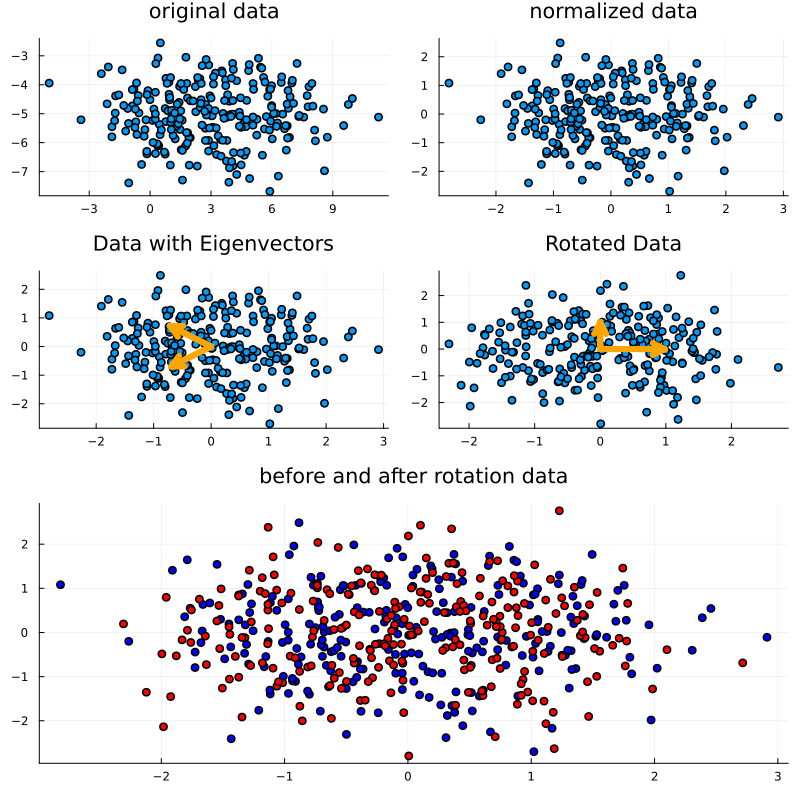

In [16]:
mean_tmp1 = [3,-5]
covariancematrix_tmp1 = [10 0; 0 1]
dist_tmp1 = MvNormal(mean_tmp1, covariancematrix_tmp1)
points_tmp1 = transpose( rand(dist_tmp1, N) )

p1 = plot( points_tmp1[:,1], points_tmp1[:,2], seriestype=:scatter, 
         title="original data", legend=false)

#now standardize / normalize
dataset_tmp_normed = myStandardize(points_tmp1)

p2 = plot( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], seriestype=:scatter, 
         title="normalized data", legend=false)

#compute the covariance matrix
cov_matrix = cov( dataset_tmp_normed )
display( cov_matrix )
#compute the eigenvectors and eigenvalues
eigen_result = eigen( cov_matrix )
eigenvectors = eigen_result.vectors
display( eigenvectors )
eigenvalues = eigen_result.values
display( eigenvalues )

means = mean(dataset_tmp_normed, dims=1)

p3 = scatter(dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], title="Data with Eigenvectors", legend=false)

# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(eigenvectors, 2)
    ev = eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

# Rotate the data by multiplying with the eigenvectors
rotated_data = dataset_tmp_normed * eigenvectors
# Create the scatter plot of the rotated data
p4 = scatter(rotated_data[:,1], rotated_data[:,2], title="Rotated Data", legend=false)
rotated_eigenvectors = eigenvectors * eigenvectors'
# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(rotated_eigenvectors, 2)
    ev = rotated_eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

#display the rotated and not rotated data
p5 = scatter(dataset_tmp_normed[:,1],dataset_tmp_normed[:,2], color="blue", title="before and after rotation data",
                legend=false)
scatter!(rotated_data[:,1],rotated_data[:,2], color="red")


layout = @layout  [grid(2,2); a{1.0w,0.4h}]
plot(p1,p2,p3,p4,p5, layout=layout, size=(800,800))

### now with off diagonal covariance terms

2×2 Matrix{Float64}:
 1.0       0.781476
 0.781476  1.0

2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

2-element Vector{Float64}:
 0.21852417646476402
 1.781475823535236

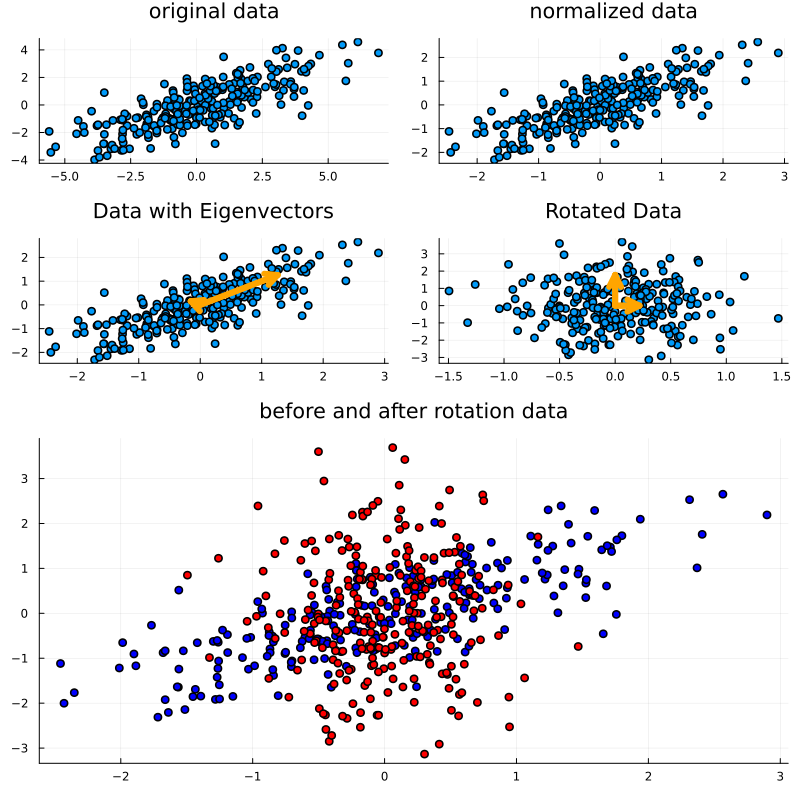

In [17]:
mean_tmp1 = [0,0]
covariancematrix_tmp1 = [5 3; 3 3]
dist_tmp1 = MvNormal(mean_tmp1, covariancematrix_tmp1)
points_tmp1 = transpose( rand(dist_tmp1, N) )

p1 = plot( points_tmp1[:,1], points_tmp1[:,2], seriestype=:scatter, 
         title="original data", legend=false)

#now standardize / normalize
dataset_tmp_normed = myStandardize(points_tmp1)

p2 = plot( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], seriestype=:scatter, 
         title="normalized data", legend=false)

#compute the covariance matrix
cov_matrix = cov( dataset_tmp_normed )
display( cov_matrix )
#compute the eigenvectors and eigenvalues
eigen_result = eigen( cov_matrix )
eigenvectors = eigen_result.vectors
display( eigenvectors )
eigenvalues = eigen_result.values
display( eigenvalues )

means = mean(dataset_tmp_normed, dims=1)

p3 = scatter(dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], title="Data with Eigenvectors", legend=false)

# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(eigenvectors, 2)
    ev = eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

# Rotate the data by multiplying with the eigenvectors
rotated_data = dataset_tmp_normed * eigenvectors
# Create the scatter plot of the rotated data
p4 = scatter(rotated_data[:,1], rotated_data[:,2], title="Rotated Data", legend=false)
rotated_eigenvectors = eigenvectors * eigenvectors'
# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(rotated_eigenvectors, 2)
    ev = rotated_eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

#display the rotated and not rotated data
p5 = scatter(dataset_tmp_normed[:,1],dataset_tmp_normed[:,2], color="blue", title="before and after rotation data",
                legend=false)
scatter!(rotated_data[:,1],rotated_data[:,2], color="red")


layout = @layout  [grid(2,2); a{1.0w,0.5h}]
plot(p1,p2,p3,p4,p5, layout=layout, size=(800,800))

## on multimodal data

2×2 Matrix{Float64}:
 1.0       0.855483
 0.855483  1.0

2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

2-element Vector{Float64}:
 0.1445167271466155
 1.855483272853385

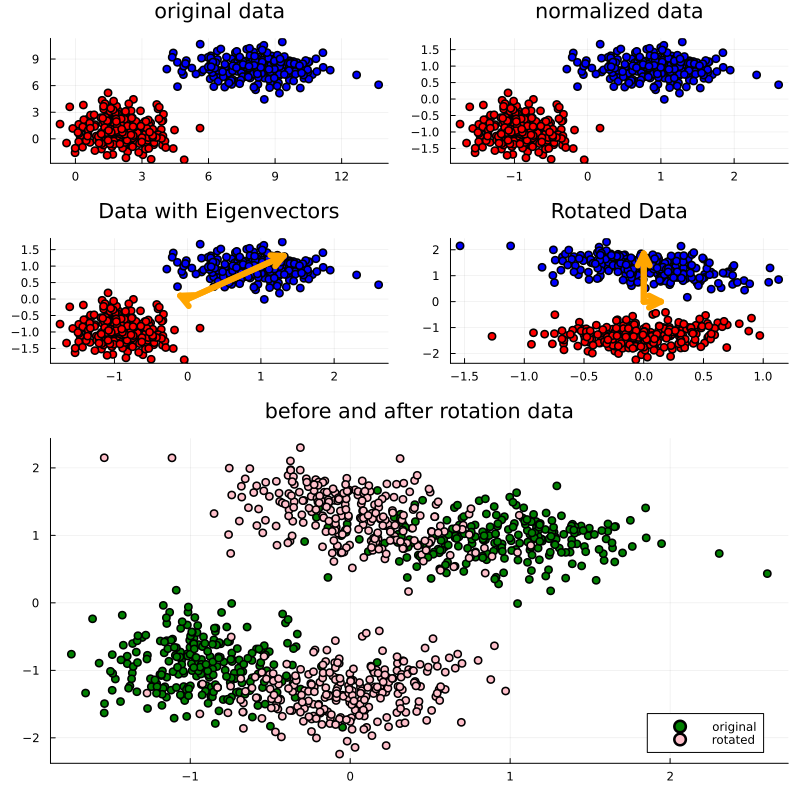

In [156]:
mean_tmp1 = [2,1]
covariancematrix_tmp1 = [1 0; 0 2]
dist_tmp1 = MvNormal(mean_tmp1, covariancematrix_tmp1)
points_tmp1 = transpose( rand(dist_tmp1, N) )

mean_tmp2 = [8,8]
covariancematrix_tmp2 = [2 0; 0 1]
dist_tmp2 = MvNormal(mean_tmp2, covariancematrix_tmp2)
points_tmp2 = transpose( rand(dist_tmp2, N) )

p1 = plot( points_tmp1[:,1], points_tmp1[:,2], seriestype=:scatter, 
         title="original data", legend=false, color=:red)
    plot!( points_tmp2[:,1], points_tmp2[:,2], seriestype=:scatter, 
         title="original data", legend=false,color=:blue)
    
#now standardize / normalize
dataset_tmp_normed = myStandardize(vcat(points_tmp1,points_tmp2))

p2 = plot( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], seriestype=:scatter,
        markercolor=[fill(:red, N); fill(:blue, N)],
         title="normalized data", legend=false, color=:red)

#compute the covariance matrix
cov_matrix = cov( dataset_tmp_normed )
display( cov_matrix )
#compute the eigenvectors and eigenvalues
eigen_result = eigen( cov_matrix )
eigenvectors = eigen_result.vectors
display( eigenvectors )
eigenvalues = eigen_result.values
display( eigenvalues )

means = mean(dataset_tmp_normed, dims=1)

p3 = scatter(dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], title="Data with Eigenvectors", 
    markercolor=[fill(:red, N); fill(:blue, N)], legend=false)

# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(eigenvectors, 2)
    ev = eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

# Rotate the data by multiplying with the eigenvectors
rotated_data = dataset_tmp_normed * eigenvectors
# Create the scatter plot of the rotated data
p4 = scatter(rotated_data[:,1], rotated_data[:,2], title="Rotated Data", 
    markercolor=[fill(:red, N); fill(:blue, N)], legend=false)
rotated_eigenvectors = eigenvectors * eigenvectors'
# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(rotated_eigenvectors, 2)
    ev = rotated_eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

#display the rotated and not rotated data
p5 = scatter(dataset_tmp_normed[:,1],dataset_tmp_normed[:,2], color="green", title="before and after rotation data",
                legend=true, labels="original")
scatter!(rotated_data[:,1],rotated_data[:,2], color="pink", labels="rotated")


layout = @layout [grid(2,2); a{1.0w,0.5h}]
plot(p1,p2,p3,p4,p5, layout=layout, size=(800,800))

In [157]:
# Calculate the percentage of variance explained by each component
var_explained = cumsum(eigenvalues) / sum(eigenvalues)

2-element Vector{Float64}:
 0.07225836357330774
 1.0

In [158]:
first_component = eigenvectors[:, end]

2-element Vector{Float64}:
 0.7071067811865475
 0.7071067811865475

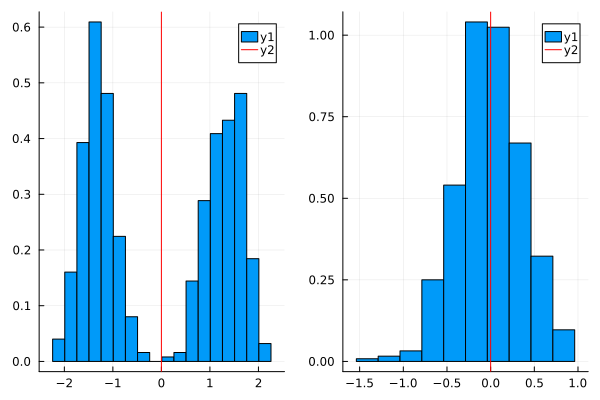

In [159]:
first_component = eigenvectors[:, 2]
second_component = eigenvectors[:, 1]

projected_data1 = dataset_tmp_normed * first_component;
projected_data2 = dataset_tmp_normed * second_component;

p1 = histogram(projected_data1, normalized=true, bins=minimum(projected_data1):0.25:maximum(projected_data1) )
vline!([0],color=:red)

p2 = histogram(projected_data2, normalized=true, bins=minimum(projected_data2):0.25:maximum(projected_data2) )
vline!([0],color=:red)

plot(p1, p2, layout=grid(1,2))

In [160]:
projected_data = dataset_tmp_normed * first_component;
labels_correct = [fill(1,N);fill(2,N)];
predictions = [x <= 0 ? 1 : 2 for x in projected_data]
accuracy = 1 - sum( predictions .!= labels_correct  ) / length(labels_correct)

1.0

In [161]:
projected_data = dataset_tmp_normed * second_component;
labels_correct = [fill(1,N);fill(2,N)];
predictions = [x <= 0 ? 1 : 2 for x in projected_data]
accuracy = 1 - sum( predictions .!= labels_correct  ) / length(labels_correct)

0.504

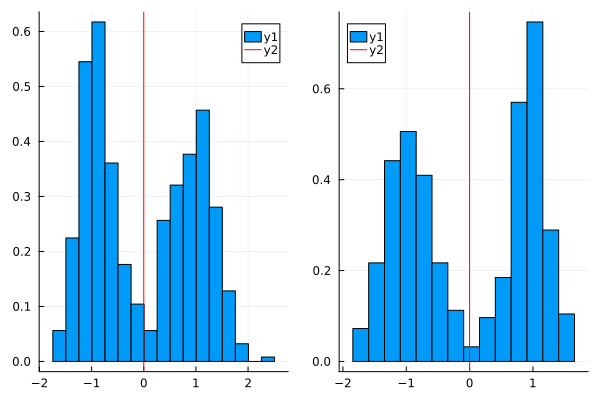

In [162]:

#investigate the predictive capabilities of the original axis
first_component = [1,0]
second_component = [0,1]

projected_data1 = dataset_tmp_normed * first_component;
projected_data2 = dataset_tmp_normed * second_component;

p1 = histogram(projected_data1, normalized=true, bins=minimum(projected_data1):0.25:maximum(projected_data1) )
vline!([0],color=:red)

p2 = histogram(projected_data2, normalized=true, bins=minimum(projected_data2):0.25:maximum(projected_data2) )
vline!([0],color=:red)

plot(p1, p2, layout=grid(1,2))

In [163]:
projected_data2 = dataset_tmp_normed * first_component;
labels_correct2 = [fill(1,N);fill(2,N)];

predictions = [x <= 0 ? 1 : 2 for x in projected_data2]
accuracy = 1 - sum( predictions .!= labels_correct  ) / length(labels_correct)

0.976

In [164]:
projected_data2 = dataset_tmp_normed * second_component;
labels_correct2 = [fill(1,N);fill(2,N)];

predictions = [x <= 0 ? 1 : 2 for x in projected_data2]
accuracy = 1 - sum( predictions .!= labels_correct  ) / length(labels_correct)

0.996

## now using the library instead of doing it manually

In [165]:
# the fit function of the MultivariateStats package needs input data of the matrix to have columns as observations
# and the rows to be variables so we need to 'transpose'
println( size(dataset_tmp_normed) )
println( size(dataset_tmp_normed') )

(500, 2)
(2, 500)


In [63]:
# 'fit' a 'PCA' model to the normalized dataset and produce at most a single dimension
pca_model = fit(PCA, dataset_tmp_normed'; maxoutdim=1);
fieldnames(typeof(pca_model))

(:mean, :proj, :prinvars, :tprinvar, :tvar)

In [66]:
#the projection vector (the eigenvector selected by the package call)
pca_model.proj

2×1 Matrix{Float64}:
 -0.7071067811865476
 -0.7071067811865475

In [83]:
# Transform the data into the PCA space (the number of points of a single dimension 'value')
transformed_data = transform( pca_model, dataset_tmp_normed' )

1×500 Matrix{Float64}:
 1.54434  1.16598  1.62551  1.13377  …  -1.02655  -1.60322  -0.635801

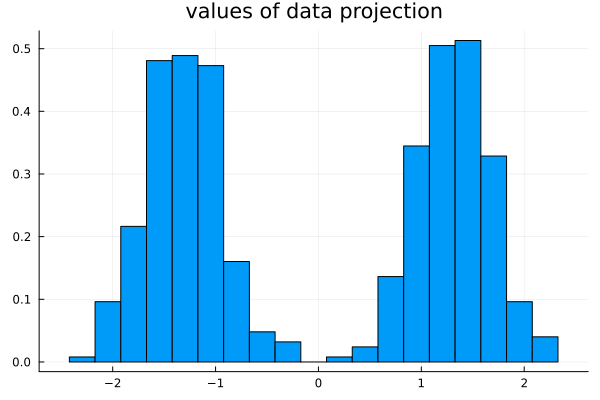

In [84]:
histogram( transformed_data', normalized=true, legend=false, title="values of data projection",
        bins=minimum(transformed_data'):0.25:maximum(transformed_data') )

In [166]:
projected_data3 = dataset_tmp_normed * pca_model.proj;
labels_correct = [fill(1,N);fill(2,N)];

predictions = [ x >= 0 ? 1 : 2 for x in projected_data3 ]
accuracy = 1 - sum( predictions .!= labels_correct  ) / length(labels_correct)

1.0

In [92]:
#reconstruct the data
reconstructed_data = reconstruct(pca_model, transformed_data)

2×500 Matrix{Float64}:
 -1.09201  -0.824474  -1.14941  -0.801697  …  0.72588  1.13365  0.449579
 -1.09201  -0.824474  -1.14941  -0.801697     0.72588  1.13365  0.449579

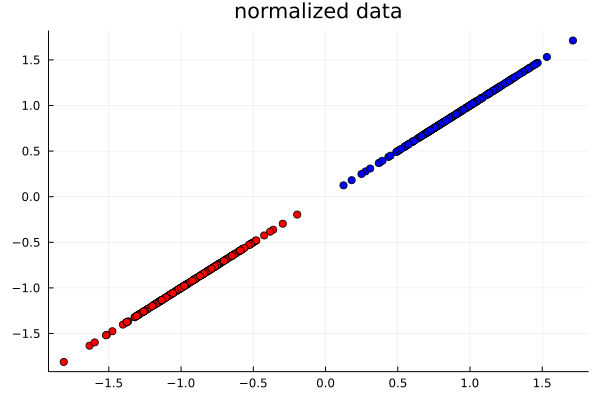

In [93]:
p = plot( reconstructed_data[1,:], reconstructed_data[2,:], seriestype=:scatter,
        markercolor=[fill(:red, N); fill(:blue, N)],
         title="reconstructed data", legend=false, color=:red )
p

In [167]:
pca_model = fit(PCA, dataset_tmp_normed'; maxoutdim=2);
transformed_data = transform( pca_model, dataset_tmp_normed' )

2×500 Matrix{Float64}:
 -1.57465   -0.907331  -0.897341   …  1.77366    1.66044   1.40636
 -0.451951  -0.396709  -0.0687631     0.334825  -0.540242  0.401481

In [168]:
reconstructed_data = reconstruct(pca_model, transformed_data)

2×500 Matrix{Float64}:
 -0.793869  -0.361064  -0.585893  -0.196917  …  1.01741  1.55612   0.710558
 -1.43302   -0.922096  -0.683139  -1.5022       1.49092  0.792102  1.27834

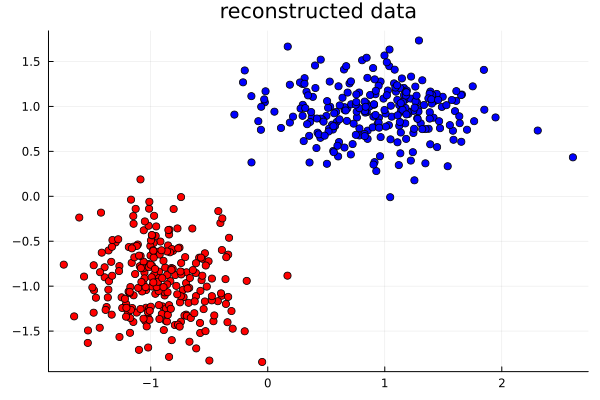

In [169]:
p = plot( reconstructed_data[1,:], reconstructed_data[2,:], seriestype=:scatter,
        markercolor=[fill(:red, N); fill(:blue, N)],
         title="reconstructed data", legend=false, color=:red )
p

## 3 component multimodal data

let us place a third component with half the number of data points for it. the way it is originally, does allow
for separation of the 3 groups of points but only with 2 dimensions the goal is to use a single dimension

2×2 Matrix{Float64}:
 1.0     0.9017
 0.9017  1.0

2×2 Matrix{Float64}:
  0.707107  -0.707107
 -0.707107  -0.707107

2-element Vector{Float64}:
 0.09829999980127452
 1.9017000001987263

[0.09829999980127443 -5.408778837917429e-17; -5.408778837917429e-17 1.9017000001987259]


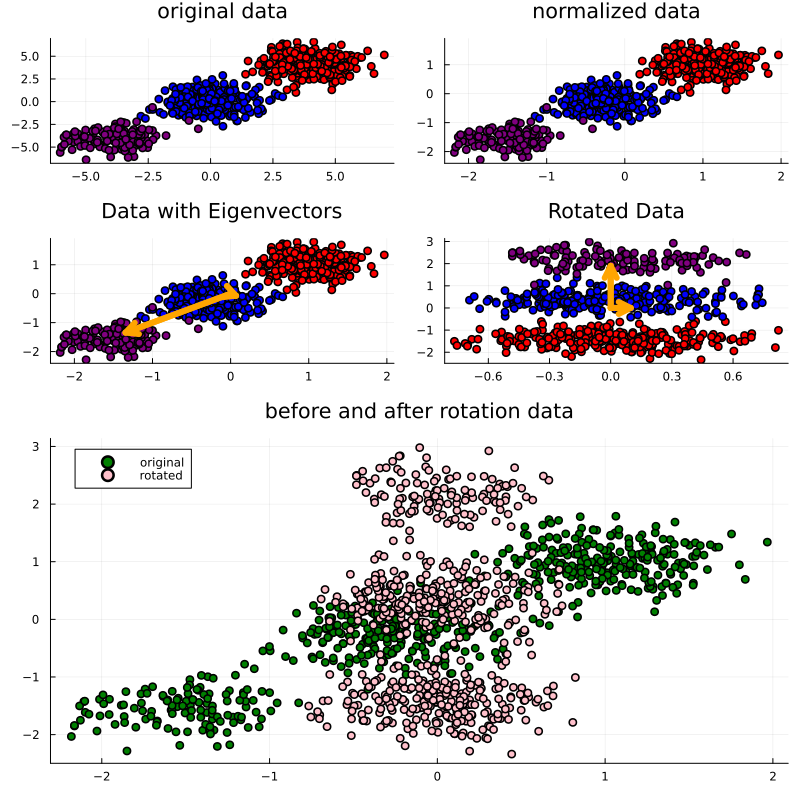

In [18]:
mean_tmp1 = [4,4]
covariancematrix_tmp1 = [1 0; 0 1]
dist_tmp1 = MvNormal(mean_tmp1, covariancematrix_tmp1)
points_tmp1 = transpose( rand(dist_tmp1, N) )

mean_tmp2 = [0,0]
covariancematrix_tmp2 = [1 0; 0 1]
dist_tmp2 = MvNormal(mean_tmp2, covariancematrix_tmp2)
points_tmp2 = transpose( rand(dist_tmp2, N) )

mean_tmp3 = [-4,-4]
covariancematrix_tmp3 = [1 0; 0 1]
dist_tmp3 = MvNormal(mean_tmp3, covariancematrix_tmp3)
points_tmp3 = transpose( rand(dist_tmp3, Int(N/2)) )

p1 = plot( points_tmp1[:,1], points_tmp1[:,2], seriestype=:scatter, 
         title="original data", legend=false, color=:red)
    plot!( points_tmp2[:,1], points_tmp2[:,2], seriestype=:scatter, 
         title="original data", legend=false,color=:blue)
    plot!( points_tmp3[:,1], points_tmp3[:,2], seriestype=:scatter, 
         title="original data", legend=false,color=:purple)
    
#now standardize / normalize
dataset_tmp_normed = myStandardize(vcat(points_tmp1,points_tmp2,points_tmp3))

p2 = plot( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], seriestype=:scatter,
        markercolor=[fill(:red, N); fill(:blue, N); fill(:purple, Int(N/2))],
         title="normalized data", legend=false, color=:red)

#compute the covariance matrix
cov_matrix = cov( dataset_tmp_normed )
display( cov_matrix )
#compute the eigenvectors and eigenvalues
eigen_result = eigen( cov_matrix )
eigenvectors = eigen_result.vectors
display( eigenvectors )
eigenvalues = eigen_result.values
display( eigenvalues )

means = mean(dataset_tmp_normed, dims=1)

p3 = scatter(dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], title="Data with Eigenvectors", 
    markercolor=[fill(:red, N); fill(:blue, N); fill(:purple, Int(N/2))], legend=false)

# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(eigenvectors, 2)
    ev = eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

# Rotate the data by multiplying with the eigenvectors
rotated_data = dataset_tmp_normed * eigenvectors
cov_matrix_rotated = cov( rotated_data )
println(cov_matrix_rotated)
# Create the scatter plot of the rotated data
p4 = scatter(rotated_data[:,1], rotated_data[:,2], title="Rotated Data", 
    markercolor=[fill(:red, N); fill(:blue, N); fill(:purple, Int(N/2))], legend=false)
rotated_eigenvectors = eigenvectors * eigenvectors'
# Add the eigenvectors to the scatter plot as arrows
for i in 1:size(rotated_eigenvectors, 2)
    ev = rotated_eigenvectors[:, i]
    scaled_ev = ev .* eigenvalues[i]
    quiver!([means[1]], [means[2]], quiver=([scaled_ev[1]], [scaled_ev[2]]), linewidth=6, color=:orange)
end

#display the rotated and not rotated data
p5 = scatter( dataset_tmp_normed[:,1], dataset_tmp_normed[:,2], color="green", title="before and after rotation data",
                legend=true, labels="original" )
scatter!( rotated_data[:,1], rotated_data[:,2], color="pink", labels="rotated" )


layout = @layout [grid(2,2); a{1.0w,0.5h}]
plot( p1, p2, p3, p4, p5, layout=layout, size=(800,800) )

In [104]:
# Calculate the percentage of variance explained by each component
var_explained = cumsum(eigenvalues) / sum(eigenvalues)

2-element Vector{Float64}:
 0.05362496667577807
 1.0

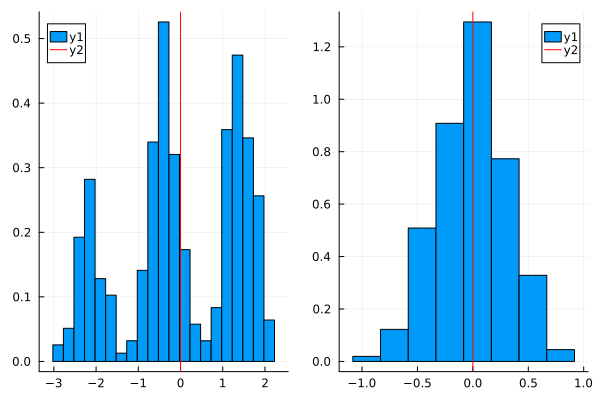

In [105]:
first_component = eigenvectors[:, 2]
second_component = eigenvectors[:, 1]

projected_data1 = dataset_tmp_normed * first_component;
projected_data2 = dataset_tmp_normed * second_component;

p1 = histogram(projected_data1, normalized=true, bins=minimum(projected_data1):0.25:maximum(projected_data1) )
vline!([0],color=:red)

p2 = histogram(projected_data2, normalized=true, bins=minimum(projected_data2):0.25:maximum(projected_data2) )
vline!([0],color=:red)

plot(p1, p2, layout=grid(1,2))

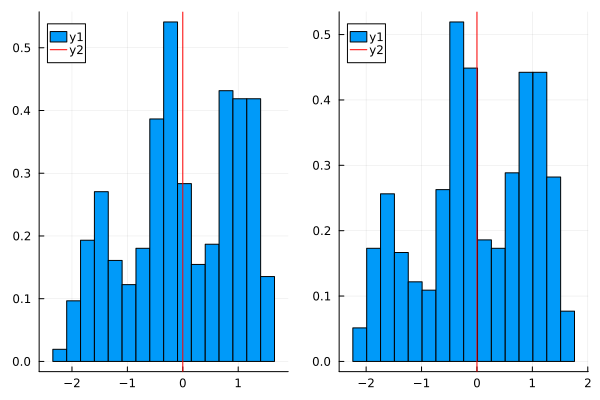

In [106]:
#investigate the predictive capabilities of the original axis
first_component = [1,0]
second_component = [0,1]

projected_data1 = dataset_tmp_normed * first_component;
projected_data2 = dataset_tmp_normed * second_component;

p1 = histogram(projected_data1, normalized=true, bins=minimum(projected_data1):0.25:maximum(projected_data1) )
vline!([0],color=:red)

p2 = histogram(projected_data2, normalized=true, bins=minimum(projected_data2):0.25:maximum(projected_data2) )
vline!([0],color=:red)

plot(p1, p2, layout=grid(1,2))

In [114]:
first_component = eigenvectors[:, 2]
second_component = eigenvectors[:, 1]

projected_data1 = dataset_tmp_normed * first_component;
projected_data2 = dataset_tmp_normed * second_component;

## let us now use clustering to produce a trained classifier to predict labels

In [116]:
kmeans_result = kmeans(projected_data1', 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.36984100483438676 1.4238302077285225 -2.150925823740527], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0.12023400925524275, 0.0688505211574828, 0.009839975419310587, 0.263507558407877, 0.11338843789451492, 0.10387832528882779, 0.3260586134411536, 0.17297258576797114, 0.011338036218977443, 0.0016731087214232332  …  0.23755387545576845, 0.054021972539249674, 0.09556316537214915, 0.07630642373361063, 0.0002568509575624489, 0.032502411416498234, 0.20186393634073418, 0.04632003434651644, 0.01393265432516344, 0.1528039135010104], [249, 252, 124], [249, 252, 124], 62.45577620731725, 3, true)

In [119]:
fieldnames(typeof(kmeans_result))

(:centers, :assignments, :costs, :counts, :wcounts, :totalcost, :iterations, :converged)

In [120]:
kmeans_result.centers

1×3 Matrix{Float64}:
 -0.369841  1.42383  -2.15093

In [124]:
println( kmeans_result.assignments[1:10] )

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [171]:
new_point = [4 4]

projected_data_new_point = new_point * first_component

1-element Vector{Int64}:
 4

In [136]:
norm( 6 - projected_data_new_point[1] )

4.585786437626905

In [141]:
distances = [ norm(c[1]-projected_data_new_point[1]) for c in eachcol(kmeans_result.centers) ]

3-element Vector{Float64}:
 1.7840545672074817
 0.009616645355427611
 3.565139386113622

In [143]:
findmin( distances )[2]

2